In [1]:
from scipy.special import logsumexp
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.spatial.distance import cdist
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [37]:
def softmin(A, eps, axis=1):
    return -eps*logsumexp(-A/eps, axis=axis)
def S(C, F, G):
    return C[:,:,None]-F[:,None,:]-G[None,:,:]


In [36]:
def barycenter(B, L, C, eps, niter):
    G = np.zeros(B.shape)
    F = np.zeros(B.shape)
    logeps_bary = np.zeros(B.shape[0])
    
    for i in range(niter):
        F = eps*np.log(B) + F + softmin(S(C, F, G), eps, axis=1)
        logeps_bary = logeps_bary - softmin(S(C, F, -np.outer(logeps_bary, np.ones(B.shape[1]))), eps, axis=0) @ L
        G = np.outer(logeps_bary, np.ones(B.shape[1])) + G + softmin(S(C, F, G), eps, axis=0)
            
    return np.exp(logeps_bary/eps)

In [29]:
nx = 100
xmin = 0.
xmax = 5.
X = np.linspace(xmin, xmax,num=nx)
dx = (xmax-xmin)/nx
def gaussian(m,s):
    return np.exp(-0.5*(X-m)**2/s**2)/(s*np.sqrt(2*np.pi))
a = gaussian(4,0.3)
b = gaussian(1.5,0.2)
c = gaussian(2,0.15)

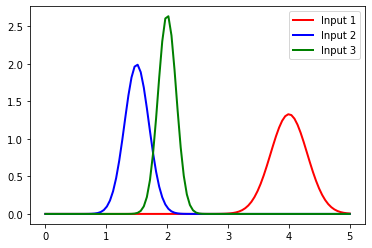

In [32]:
plt.figure
plt.plot(X, a,'r', label='Input 1',linewidth=2)
plt.plot(X, b, 'b', label='Input 2',linewidth=2)
plt.plot(X, c, 'g', label='Input 3',linewidth=2)
plt.savefig('Gaussian1d-Inputs.eps')
plt.legend()

In [33]:
fields = []
fields.append(a)
fields.append(b)
fields.append(c)
myFields = np.vstack(fields).T
weights = np.ones(len(fields))/len(fields)

# Cost function
C = cdist(X.reshape((nx, 1)), X.reshape((nx, 1)), metric='sqeuclidean')



In [37]:
means = np.array([4, 1.5,2])
stds = np.array([0.3,0.2,0.15])
weights = np.ones(3)/3.
# --- True Guassian barycenter ------
# Theorem 2.4 in https://arxiv.org/pdf/1511.05355.pdf

var_bary = 1.
flag = False

while(True):
    
    var_bary_new = 0
    for w, s in zip(weights, stds):
        var_bary_new += w*np.sqrt(var_bary)*s
        
    if np.abs(var_bary_new - var_bary) < 1.e-7:
        var_bary = var_bary_new
        break
    else:
        var_bary = var_bary_new

std_bary = np.sqrt(var_bary)

mean_bary = np.sum(weights * means)
print(mean_bary, std_bary)
true_gauss_bary = gaussian(mean_bary, std_bary)

2.5 0.21666682467575796


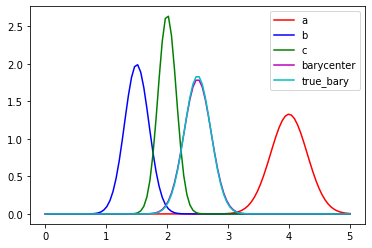

In [38]:
plt.figure
plt.plot(X, a,'r', label='a')
plt.plot(X, b, 'b', label='b')
plt.plot(X, c, 'g', label='c')
plt.plot(X, bary, 'm', label='barycenter')
plt.plot(X, true_gauss_bary , 'c', label='true_bary')
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


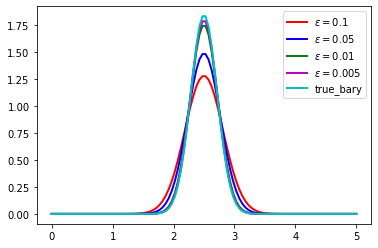

In [42]:
bary_en1 = barycenter(myFields, weights, C, eps=0.1, niter=500)
bary_en2 = barycenter(myFields, weights, C, eps=0.05, niter=500)
bary_en3 = barycenter(myFields, weights, C, eps=0.01, niter=500)
bary_en4 = barycenter(myFields, weights, C, eps=0.005, niter=500)

plt.figure
plt.plot(X, bary_en1, 'r', label= '$\epsilon=0.1$',linewidth=2)
plt.plot(X, bary_en2, 'b', label= '$\epsilon=0.05$',linewidth=2)
plt.plot(X, bary_en3, 'g', label= '$\epsilon=0.01$',linewidth=2)
plt.plot(X, bary_en4, 'm', label='$\epsilon=0.005$',linewidth=2)
plt.plot(X, true_gauss_bary , 'c', label='true_bary',linewidth=2)
plt.legend()
plt.savefig('Gaussian1d-barycenter.eps')
plt.show()

### The 2D case


In [7]:
# xmin = 0.
# xmax = 5.
# ymin = 0.
# ymax = 5.
xmin = -1.
xmax = 1.
ymin = -1.
ymax = 1.

nx = 80
ny = 80
X = np.linspace(xmin, xmax,num=nx)
Y = np.linspace(ymin, ymax,num=ny)
xv, yv = np.meshgrid(X, Y)
points = np.vstack([xv.ravel(), yv.ravel()]).T

In [8]:
# Data generators
def multivariate_gaussian(m,S, points):
    return np.array([np.exp(-0.5*(p-m)@np.linalg.inv(S)@(p-m))/(np.sqrt( (2*np.pi)**(m.shape[0])*np.linalg.det(S))) for p in points])

m1 = np.array([-0.2, 0.4])
A1 = np.array([[0.2, 0.02],[0.02, 0.1]])
S1 = np.matmul(A1, np.transpose(A1))


g1 = multivariate_gaussian(m1, S1, points)

m2 = np.array([0.5, 0.0])
A2 = np.array([[0.1, -0.01],[-0.01, 0.2]])
S2 = np.matmul(A2, np.transpose(A2))



g2 = multivariate_gaussian(m2, S2, points)

In [13]:
g1.shape

(6400,)

In [13]:
S1

array([[0.0404, 0.006 ],
       [0.006 , 0.0104]])

In [14]:
S2

array([[ 0.0101, -0.003 ],
       [-0.003 ,  0.0401]])

In [15]:
# plt.pcolor(X, Y, g1.reshape(nx,ny),shading='auto')
# plt.show()
# plt.pcolor(X, Y, g2.reshape(nx,ny),shading='auto')
# plt.show()

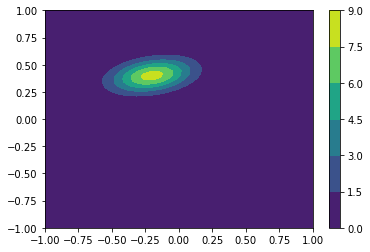

In [16]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, g1.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Gaussian 1')
plt.savefig('Input_Gaussian_1.eps')
plt.show()

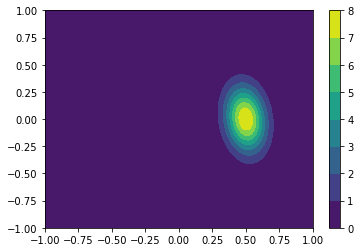

In [17]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, g2.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Gaussian 2')
plt.savefig('Input_Gaussian_2.eps')
plt.show()

In [18]:
# Cost function
C_2D = cdist(points, points, metric='sqeuclidean')


In [19]:
fields_2D = []
fields_2D.append(g1)
fields_2D.append(g2)
myFields_2D = np.vstack(fields_2D).T
weights = np.ones(len(fields_2D))/len(fields_2D)

bary_2D = barycenter(myFields_2D, weights, C_2D, eps=0.0001, niter=200)

KeyboardInterrupt: 

In [ ]:
# plt.pcolor(X, Y, bary_2D.reshape(nx,ny),shading='auto')
# plt.show()
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, bary_2D.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Barycenter')
plt.savefig('Barycenter_sinkhorn_0001.eps')
plt.show()


In [ ]:
# fig = plt.figure(figsize=(20,10))

# ax1 = fig.add_subplot(2,3,1,projection='3d')
# ax1.plot_surface(xv,yv,g1.reshape(nx,ny), cmap=cm.coolwarm,linewidth=0, antialiased=False)

# ax2 = fig.add_subplot(2,3,2,projection='3d')
# ax2.plot_surface(xv,yv,bary_2D.reshape(nx,ny), cmap=cm.coolwarm,linewidth=0, antialiased=False)

# ax3 = fig.add_subplot(2,3,3,projection='3d')
# ax3.plot_surface(xv,yv,g2.reshape(nx,ny), cmap=cm.coolwarm,linewidth=0, antialiased=False)

# ax4 = fig.add_subplot(2,3,4,projection='3d')
# ax4.contourf(xv, yv, g1.reshape(nx,ny), cmap=cm.viridis)
# ax4.view_init(90, 270)
# ax4.grid(False)

# ax5 = fig.add_subplot(2,3,5,projection='3d')
# ax5.contourf(xv, yv, bary_2D.reshape(nx,ny), cmap=cm.viridis)
# ax5.view_init(90, 270)
# ax5.grid(False)

# ax6 = fig.add_subplot(2,3,6,projection='3d')
# ax6.contourf(xv, yv, g2.reshape(nx,ny), cmap=cm.viridis)
# ax6.view_init(90, 270)
# ax6.grid(False)


# plt.show()

In [ ]:
# from mayavi import mlab
# fig = mlab.figure()
# mlab.surf(X,Y,bary_2D.reshape(nx,ny) , warp_scale="auto", opacity=1)
# mlab.axes(xlabel='X', ylabel='Y', zlabel='Z')
# mlab.show()

In [23]:
mean_true = np.array([0.15, 0.2 ])
A_true = np.array([[0.14990449, 0. ],[0.01126781, 0.14985991]])
S_true = np.matmul(A_true, np.transpose(A_true))
g_true = multivariate_gaussian(mean_true, S_true, points)

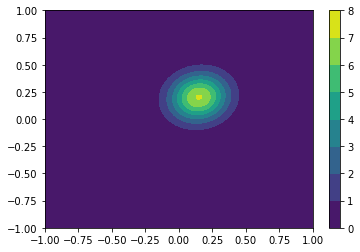

In [24]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, g_true.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Barycenter_true')
plt.savefig('Barycenter_true.eps')
plt.show()

dim 2 0000 fit_gaussian_mean_loss 4.622289e-05
dim 2 0001 fit_gaussian_mean_loss 5.516987e-05
dim 2 0002 fit_gaussian_mean_loss 1.204091e-04
dim 2 0003 fit_gaussian_mean_loss 3.636000e-04
dim 2 0004 fit_gaussian_mean_loss 4.003675e-04
dim 2 0000 fit_gaussian_cov_loss 1.769521e-04
dim 2 0001 fit_gaussian_cov_loss 2.830838e-04
dim 2 0002 fit_gaussian_cov_loss 2.390559e-04
dim 2 0003 fit_gaussian_cov_loss 2.033841e-04
dim 2 0004 fit_gaussian_cov_loss 1.978855e-04
dim 2 0000 W2_lp 1.794347e-02
dim 2 0001 W2_lp 1.710380e-02
dim 2 0002 W2_lp 1.674489e-02
dim 2 0003 W2_lp 1.666511e-02
dim 2 0004 W2_lp 1.587143e-02
$$
\begin{table}
\centering
\caption{Loss table for Gaussian experiment with method Ours}
\begin{tabular}{ll}
\toprule
Loss & $d=2$\\
\midrule
Gaussian mean diff & $1.97 \times 10^{-4}$($1.54 \times 10^{-4}$)\\
Gaussian cov diff & $2.20 \times 10^{-4}$($3.73 \times 10^{-5}$)\\
W2_lp & $1.69 \times 10^{-2}$($6.73 \times 10^{-4}$)\\
\bottomrule
\end{tabular}
\end{table}
$$

In [ ]:
np.mean(bary_2D)

batch_size = 8109
epoch = 10000
layer : 128-256

dim 2 0000 fit_gaussian_mean_loss 7.579211e-05
dim 2 0001 fit_gaussian_mean_loss 3.432067e-04
dim 2 0002 fit_gaussian_mean_loss 1.518142e-04
dim 2 0003 fit_gaussian_mean_loss 7.428419e-05
dim 2 0004 fit_gaussian_mean_loss 2.614893e-04
dim 2 0000 fit_gaussian_cov_loss 3.103647e-04
dim 2 0001 fit_gaussian_cov_loss 3.491121e-04
dim 2 0002 fit_gaussian_cov_loss 2.734976e-04
dim 2 0003 fit_gaussian_cov_loss 2.850990e-04
dim 2 0004 fit_gaussian_cov_loss 2.950787e-04
dim 2 0000 W2_lp 1.549360e-02
dim 2 0001 W2_lp 1.656218e-02
dim 2 0002 W2_lp 1.579797e-02
dim 2 0003 W2_lp 1.574728e-02
dim 2 0004 W2_lp 1.632106e-02
\begin{table}
\centering
\caption{Loss table for Gaussian experiment with method Ours}
\begin{tabular}{ll}
\toprule
Loss & $d=2$\\
\midrule
Gaussian mean diff & $1.81 \times 10^{-4}$($1.06 \times 10^{-4}$)\\
Gaussian cov diff & $3.03 \times 10^{-4}$($2.62 \times 10^{-5}$)\\
W2_lp & $1.60 \times 10^{-2}$($3.95 \times 10^{-4}$)\\
\bottomrule
\end{tabular}
\end{table}

## CWB method

batch size = 4096
layer d-64-128-1
Quaratic epsilon = 10^-4

dim 2 0000 fit_gaussian_mean_loss 8.946900e-05
dim 2 0001 fit_gaussian_mean_loss 6.456989e-05
dim 2 0002 fit_gaussian_mean_loss 1.132215e-04
dim 2 0003 fit_gaussian_mean_loss 1.988828e-04
dim 2 0004 fit_gaussian_mean_loss 4.002236e-04
dim 2 0000 fit_gaussian_cov_loss 1.806752e-04
dim 2 0001 fit_gaussian_cov_loss 1.554143e-04
dim 2 0002 fit_gaussian_cov_loss 1.690408e-04
dim 2 0003 fit_gaussian_cov_loss 1.069813e-04
dim 2 0004 fit_gaussian_cov_loss 1.844868e-04
dim 2 0000 W2_lp 1.698161e-02
dim 2 0001 W2_lp 1.550135e-02
dim 2 0002 W2_lp 1.843264e-02
dim 2 0003 W2_lp 1.688803e-02
dim 2 0004 W2_lp 1.673603e-02
\begin{table}
\centering
\caption{Loss table for Gaussian experiment with method Ours}
\begin{tabular}{ll}
\toprule
Loss & $d=2$\\
\midrule
Gaussian mean diff & $1.73 \times 10^{-4}$($1.22 \times 10^{-4}$)\\
Gaussian cov diff & $1.59 \times 10^{-4}$($2.81 \times 10^{-5}$)\\
W2_lp & $1.69 \times 10^{-2}$($9.32 \times 10^{-4}$)\\
\bottomrule
\end{tabular}
\end{table}

## Cuturi method
dim 2 0000 fit_gaussian_mean_loss 1.275770e-03
dim 2 0001 fit_gaussian_mean_loss 1.344574e-03
dim 2 0002 fit_gaussian_mean_loss 5.165332e-03
dim 2 0003 fit_gaussian_mean_loss 2.247016e-03
dim 2 0004 fit_gaussian_mean_loss 1.994865e-03
dim 2 0000 fit_gaussian_cov_loss 3.194915e-02
dim 2 0001 fit_gaussian_cov_loss 3.194915e-02
dim 2 0002 fit_gaussian_cov_loss 3.194915e-02
dim 2 0003 fit_gaussian_cov_loss 3.194915e-02
dim 2 0004 fit_gaussian_cov_loss 3.194915e-02
dim 2 0000 W2_lp 2.124654e-01
dim 2 0001 W2_lp 2.103670e-01
dim 2 0002 W2_lp 2.142364e-01
dim 2 0003 W2_lp 2.129630e-01
dim 2 0004 W2_lp 2.132373e-01
\begin{table}
\centering
\caption{Loss table for Gaussian experiment with method CD14}
\begin{tabular}{ll}
\toprule
Loss & $d=2$\\
\midrule
Gaussian mean diff & $2.41 \times 10^{-3}$($1.43 \times 10^{-3}$)\\
Gaussian cov diff & $3.19 \times 10^{-2}$($2.82 \times 10^{-12}$)\\
W2_lp & $2.13 \times 10^{-1}$($1.28 \times 10^{-3}$)\\
\bottomrule
\end{tabular}
\end{table}

In [ ]:
mean_fit = np.array([0.149952 ,  0.20004319])
S_fit = np.array([[0.02241899, 0.0017524 ],[0.0017524,  0.0227007 ]])
g_fit = multivariate_gaussian(mean_fit, S_fit, points)

In [ ]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, g_fit.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Barycenter_true')
plt.savefig('Barycenter_cwb_R_L2_en4.eps')
plt.show()

### Entropy CWB ep=10^-3
dim 2 0000 fit_gaussian_mean_loss 2.074180e-04
dim 2 0001 fit_gaussian_mean_loss 1.730539e-04
dim 2 0002 fit_gaussian_mean_loss 2.125627e-04
dim 2 0003 fit_gaussian_mean_loss 3.437977e-04
dim 2 0004 fit_gaussian_mean_loss 1.001389e-04
dim 2 0000 fit_gaussian_cov_loss 8.566652e-04
dim 2 0001 fit_gaussian_cov_loss 8.633879e-04
dim 2 0002 fit_gaussian_cov_loss 8.276172e-04
dim 2 0003 fit_gaussian_cov_loss 8.391186e-04
dim 2 0004 fit_gaussian_cov_loss 8.160181e-04
dim 2 0000 W2_lp 1.895768e-02
dim 2 0001 W2_lp 1.923837e-02
dim 2 0002 W2_lp 1.911340e-02
dim 2 0003 W2_lp 1.693125e-02
dim 2 0004 W2_lp 1.852287e-02
\begin{table}
\centering
\caption{Loss table for Gaussian experiment with method Ours}
\begin{tabular}{ll}
\toprule
Loss & $d=2$\\
\midrule
Gaussian mean diff & $2.07 \times 10^{-4}$($7.91 \times 10^{-5}$)\\
Gaussian cov diff & $8.41 \times 10^{-4}$($1.76 \times 10^{-5}$)\\
W2_lp & $1.86 \times 10^{-2}$($8.46 \times 10^{-4}$)\\
\bottomrule
\end{tabular}
\end{table}


In [ ]:
mean_fit = np.array([0.15009416, 0.19981519])
S_fit = np.array([[0.02324643, 0.00176585],[0.00176585, 0.02293332]])
g_fit = multivariate_gaussian(mean_fit, S_fit, points)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, g_fit.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Barycenter_true')
plt.savefig('Barycenter_cwb_R_Entropy_en3.eps')
plt.show()

In [ ]:
mean_fit = np.array([0.14998425, 0.20009889])
S_fit = np.array([[0.02319834, 0.00180517],[0.00180517, 0.02291727]])
g_fit = multivariate_gaussian(mean_fit, S_fit, points)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, g_fit.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Barycenter_true')
plt.savefig('Barycenter_cwb_R_Entropy_en3.eps')
plt.show()

## Entropy ep= 10-1
dim 2 0000 fit_gaussian_mean_loss 2.101484e-04
dim 2 0001 fit_gaussian_mean_loss 2.230536e-04
dim 2 0002 fit_gaussian_mean_loss 8.916820e-05
dim 2 0003 fit_gaussian_mean_loss 2.486334e-04
dim 2 0004 fit_gaussian_mean_loss 2.789776e-04
dim 2 0000 fit_gaussian_cov_loss 6.732062e-03
dim 2 0001 fit_gaussian_cov_loss 6.752066e-03
dim 2 0002 fit_gaussian_cov_loss 6.750184e-03
dim 2 0003 fit_gaussian_cov_loss 6.756030e-03
dim 2 0004 fit_gaussian_cov_loss 6.735407e-03
dim 2 0000 W2_lp 3.266584e-02
dim 2 0001 W2_lp 3.247123e-02
dim 2 0002 W2_lp 3.059996e-02
dim 2 0003 W2_lp 3.339484e-02
dim 2 0004 W2_lp 3.176242e-02
\begin{table}
\centering
\caption{Loss table for Gaussian experiment with method Ours}
\begin{tabular}{ll}
\toprule
Loss & $d=2$\\
\midrule
Gaussian mean diff & $2.10 \times 10^{-4}$($6.48 \times 10^{-5}$)\\
Gaussian cov diff & $6.75 \times 10^{-3}$($9.57 \times 10^{-6}$)\\
W2_lp & $3.22 \times 10^{-2}$($9.45 \times 10^{-4}$)\\
\bottomrule
\end{tabular}
\end{table}


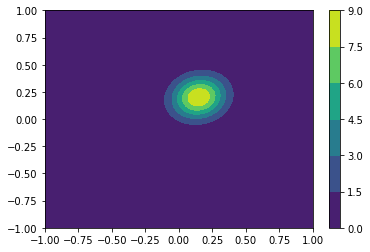

In [22]:
mean_fit = np.array([0.14985155, 0.20014874])
S_fit = np.array([[0.01821156, 0.00183171],[0.00183171, 0.01737592]])
g_fit = multivariate_gaussian(mean_fit, S_fit, points)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, g_fit.reshape(nx,ny), cmap=cm.viridis)
fig.colorbar(cp) # Add a colorbar to a plot
#ax.set_title('Barycenter_true')
plt.savefig('Barycenter_cwb_R_Entropy_en1.eps')
plt.show()

### Mnist data

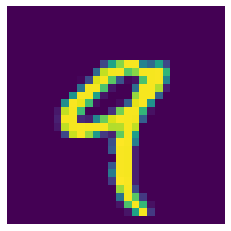

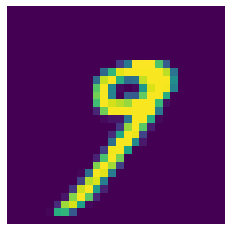

In [74]:
import tensorflow as tf
(img_train, _), _ = tf.keras.datasets.mnist.load_data()
i=33
plt.figure()

plt.imshow(img_train[4])
plt.axis('off')
plt.show()
plt.figure()

plt.imshow(img_train[33])
plt.axis('off')
plt.show()

In [57]:
image1 = img_train[4].flatten()/255.0+1.e-6
image2 = img_train[33].flatten()/255.0+1.e-6

In [58]:
xmin = 0.
xmax = 1.
ymin = 0.
ymax = 1.

nx = 28
ny = 28
X = np.linspace(xmin, xmax,num=nx)
Y = np.linspace(ymin, ymax,num=ny)
xv, yv = np.meshgrid(X, Y)
points = np.vstack([xv.ravel(), yv.ravel()]).T

In [59]:
# Cost function
C_image = cdist(points, points, metric='sqeuclidean')

In [60]:
fields_image = []
fields_image.append(image1)
fields_image.append(image2)
myFields_image = np.vstack(fields_image).T
weights = np.ones(len(fields_image))/len(fields_image)

In [63]:
bary_image = barycenter(myFields_image, weights, C_image, eps=0.0001, niter=200)

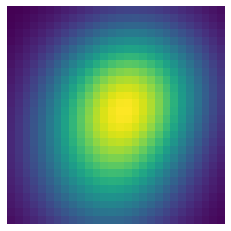

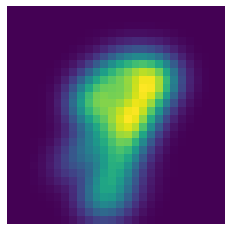

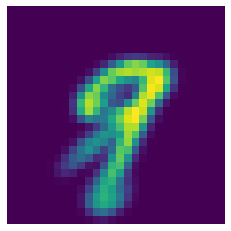

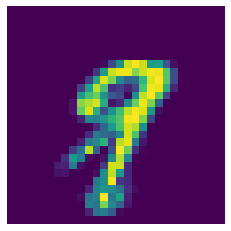

In [75]:
epsilon = [0.1,0.01,0.001,0.0001]
for index in range(len(epsilon)):
    plt.figure()
    bary_image = barycenter(myFields_image, weights, C_image, eps=epsilon[index], niter=500)
    plt.imshow(bary_image.reshape(28,28))
    plt.axis('off')
    plt.savefig('Barycenter_sinkhorn_R_Entropy_en'+str(index+1)+'.eps')
    